In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('../input/themanywowsofownwilson/Owen_Wilson_Wows.csv')

In [4]:
df.head()

,movie,character,director,movie_duration,release_date,total_wows_in_movie,year
0,Bottle Rocket,Dignan,Wes Anderson,01:31:44,1996-02-21,3,1996
1,The Haunting,Luke Sanderson,Jan de Bont,01:52:37,1999-07-23,5,1999
2,Breakfast of Champions,Monte Rapid,Alan Rudolph,01:49:49,1999-09-17,1,1999
3,Shanghai Noon,Roy O'Bannon,Tom Dey,01:50:18,2000-05-23,1,2000
4,Meet the Parents,Kevin Rawley,Jay Roach,01:47:39,2000-10-06,2,2000


Correct a spelling:

In [5]:
df.at[27,'character']='Lightning McQueen'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   movie                29 non-null     object
 1   character            29 non-null     object
 2   director             29 non-null     object
 3   movie_duration       29 non-null     object
 4   release_date         29 non-null     object
 5   total_wows_in_movie  29 non-null     int64 
 6   year                 29 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 1.7+ KB


In [7]:
df.describe(include='all')

,movie,character,director,movie_duration,release_date,total_wows_in_movie,year
count,29,29,29,29,29,29.000000,29.000000
unique,29,25,23,28,29,NaN,NaN
top,Bottle Rocket,Lightning McQueen,Wes Anderson,01:28:10,1996-02-21,NaN,NaN
freq,1,3,2,2,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.137931,2007.379310
std,NaN,NaN,NaN,NaN,NaN,2.474500,5.821228
min,NaN,NaN,NaN,NaN,NaN,1.000000,1996.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,2003.000000
50%,NaN,NaN,NaN,NaN,NaN,2.000000,2008.000000
75%,NaN,NaN,NaN,NaN,NaN,4.000000,2011.000000


In [8]:
total_wows = df['total_wows_in_movie'].sum()
total_movies = df['movie'].count()
avg_wow_per_movie = total_wows/total_movies
print("Owen Wilson has said wow",total_wows,"times in", total_movies, "movies combined.","\n\nHe said wow","{:.2f}".format(avg_wow_per_movie),"times per movie.")


Owen Wilson has said wow 91 times in 29 movies combined. 

He said wow 3.14 times per movie.


In [9]:
wow_years = df.groupby(['year'])['total_wows_in_movie'].sum()
wow_years = wow_years.to_frame().reset_index()

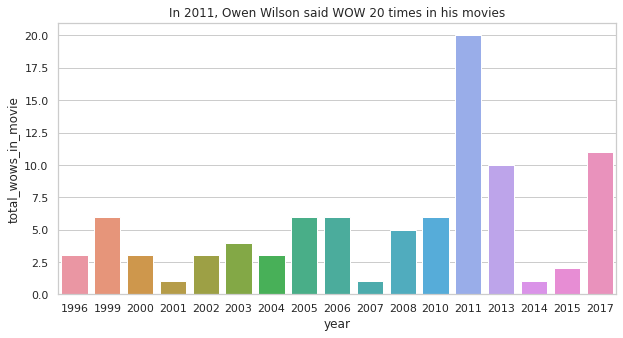

In [10]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'year', y='total_wows_in_movie', data = wow_years)
ax.set_title('In 2011, Owen Wilson said WOW 20 times in his movies')

plt.show()

In [11]:
wow_directors = df.groupby(['director'])['total_wows_in_movie'].sum()
wow_directors = wow_directors.to_frame().reset_index()
wow_directors.sort_values(by=['total_wows_in_movie'], inplace=True, ascending = False)
wow_directors = wow_directors.reset_index(drop=True)

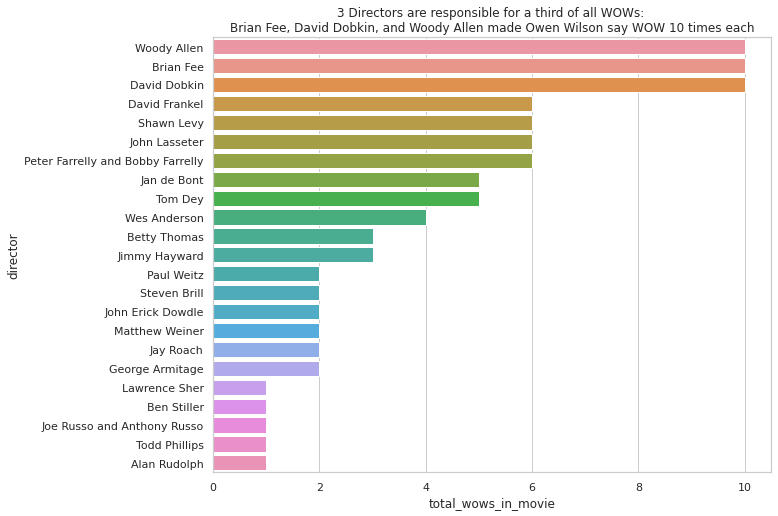

In [12]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y = 'director', x='total_wows_in_movie', data = wow_directors)
ax.set_title('3 Directors are responsible for a third of all WOWs: \nBrian Fee, David Dobkin, and Woody Allen made Owen Wilson say WOW 10 times each')

plt.show()

In [13]:
wow_char = df.groupby(['character'])['total_wows_in_movie'].sum()

wow_char = wow_char.to_frame().reset_index()
wow_char.sort_values(by=['total_wows_in_movie'], inplace=True, ascending = False)
wow_char = wow_char.reset_index(drop = True)

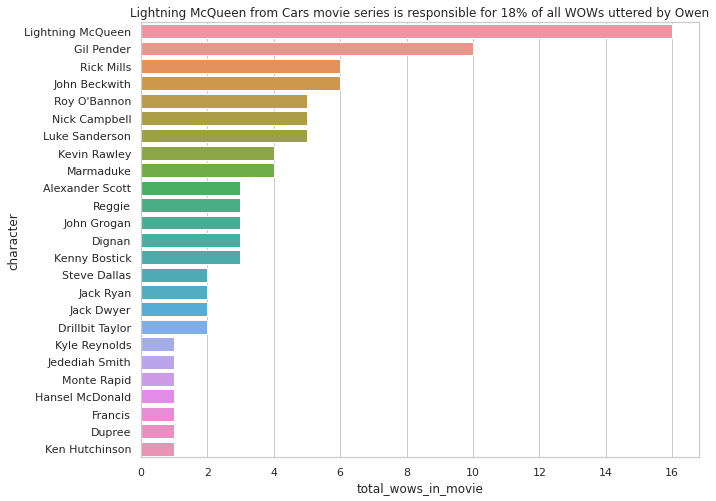

In [14]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y = 'character', x='total_wows_in_movie', data = wow_char)
ax.set_title('Lightning McQueen from Cars movie series is responsible for 18% of all WOWs uttered by Owen')

plt.show()